In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.svm import SVC

# Q1

In [2]:
data = pd.read_csv('data/car_data.csv', index_col='User ID')

In [3]:
print(data.shape)
data.head(5)

(1000, 4)


,Gender,Age,AnnualSalary,Purchased
User ID,,,,
385,Male,35,20000,0
681,Male,40,43500,0
353,Male,49,74000,0
895,Male,40,107500,1
661,Male,25,79000,0


[]

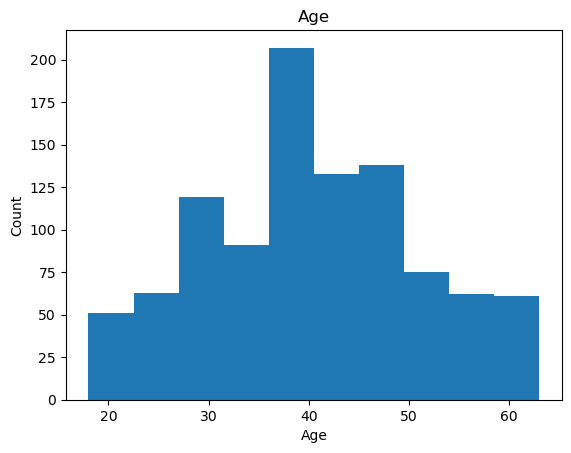

In [4]:
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(data['Age'])
plt.plot()

## Plotting

[]

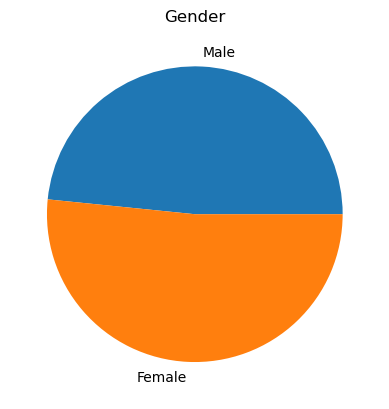

In [5]:
labels = 'Male', 'Female'
data_sizes = data['Gender'].value_counts()
sizes = [data_sizes['Male'], data_sizes['Female']]

fig, ax = plt.subplots()
plt.title("Gender")
ax.pie(sizes, labels=labels)
ax.plot()

## Extract data and label

In [6]:
x = data.drop(columns='Purchased')
y = data['Purchased']

In [7]:
encoder = LabelEncoder()
x['Gender'] = encoder.fit_transform(x['Gender'])

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x.head()

,Gender,Age,AnnualSalary
User ID,,,
385,1,35,20000
681,1,40,43500
353,1,49,74000
895,1,40,107500
661,1,25,79000


## Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

## Logistic

In [11]:
def z(x, w):
    return w.dot(x.T)

def sigmoid(z):
    return 1/ (1 + np.e**(-z))

def error(y, y_hat):
    return y - y_hat

def initial_w(size):
    return np.zeros(size)

def calc_gradient(x, y, y_hat):
    e = error(y, y_hat)
    return - x.T.dot(e)

def bce(y, y_hat):
    m = len(y)
    return -1 / m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def accuracy(y, y_hat):
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    
    correct = np.sum(y == y_hat)
    m = len(y)
    
    return correct / m

def logistic_regression(x, y, epochs, lr):
    losses = []
    accuracies = []
    w = initial_w(n)
    for i in range(epochs):
        y_hat = sigmoid(z(x, w))
        dw = calc_gradient(x, y, y_hat)
        w -= lr * dw
 
        loss = bce(y, y_hat)
        losses.append(loss)
        
        acc = accuracy(y, y_hat)
        accuracies.append(acc)
        
        print(f"epoch: {i + 1}, accuracy: {acc:.2}, loss: {loss:.3f}")
        
        
    return w, losses, accuracies

In [12]:
m, n = x_train.shape
epochs = 100
lr = 0.005

In [13]:
w, losses, accuracies = logistic_regression(x_train, y_train, epochs, lr)

epoch: 1, accuracy: 0.41, loss: 0.693
epoch: 2, accuracy: 0.81, loss: 0.433
epoch: 3, accuracy: 0.82, loss: 0.416
epoch: 4, accuracy: 0.82, loss: 0.409
epoch: 5, accuracy: 0.82, loss: 0.405
epoch: 6, accuracy: 0.82, loss: 0.403
epoch: 7, accuracy: 0.82, loss: 0.402
epoch: 8, accuracy: 0.82, loss: 0.401
epoch: 9, accuracy: 0.82, loss: 0.400
epoch: 10, accuracy: 0.82, loss: 0.400
epoch: 11, accuracy: 0.82, loss: 0.400
epoch: 12, accuracy: 0.82, loss: 0.400
epoch: 13, accuracy: 0.82, loss: 0.400
epoch: 14, accuracy: 0.82, loss: 0.400
epoch: 15, accuracy: 0.82, loss: 0.399
epoch: 16, accuracy: 0.83, loss: 0.399
epoch: 17, accuracy: 0.83, loss: 0.399
epoch: 18, accuracy: 0.83, loss: 0.399
epoch: 19, accuracy: 0.83, loss: 0.399
epoch: 20, accuracy: 0.83, loss: 0.399
epoch: 21, accuracy: 0.83, loss: 0.399
epoch: 22, accuracy: 0.83, loss: 0.399
epoch: 23, accuracy: 0.83, loss: 0.399
epoch: 24, accuracy: 0.83, loss: 0.399
epoch: 25, accuracy: 0.83, loss: 0.399
epoch: 26, accuracy: 0.83, loss: 0

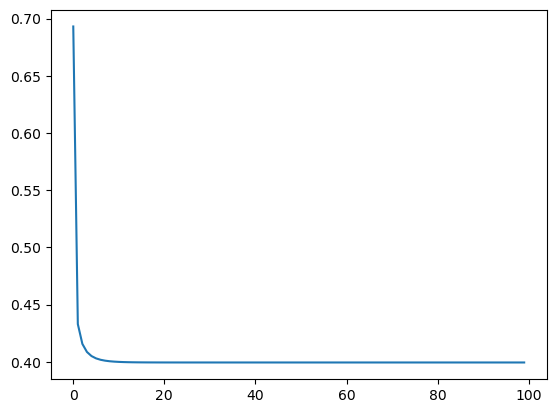

In [14]:
plt.plot(losses)

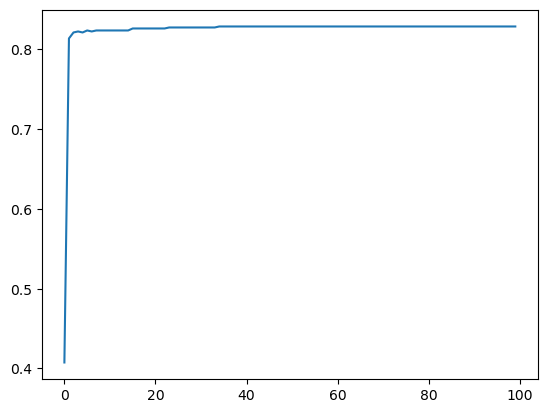

In [15]:
plt.plot(accuracies)

In [16]:
y_hat = sigmoid(z(x_test, w))

loss_test = bce(y_test, y_hat)

acc_test = accuracy(y_test, y_hat)

print(f"test accuracy: {acc_test}, test loss: {loss_test}")

test accuracy: 0.81, test loss: 0.43773915732763213


# Q2

In [17]:
data2 = pd.read_csv('data/cats.csv', index_col='rownames')

In [18]:
data2.head()

,Gender,Bwt,Hwt
rownames,,,
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3


In [19]:
encoder2 = LabelEncoder()
data2['Gender'] = encoder2.fit_transform(data2['Gender'])

In [20]:
y = data2['Gender']
x = data2.drop(columns='Gender')

In [21]:
scaler2 = StandardScaler()
x_scaled2 = scaler2.fit_transform(x)

In [22]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    x_scaled2,
    y, test_size=0.2,
    random_state=42
)

x_train, x_test, y_train, y_test = train_test_split(
    x.to_numpy(),
    y.to_numpy(),
    test_size=0.2,
    random_state=42
)

In [23]:
x_male_scaled = x_train_scaled[y_train_scaled==1]
x_female_scaled = x_train_scaled[y_train_scaled==0]

x_male = x_train[y_train==1]
x_female = x_train[y_train==0]

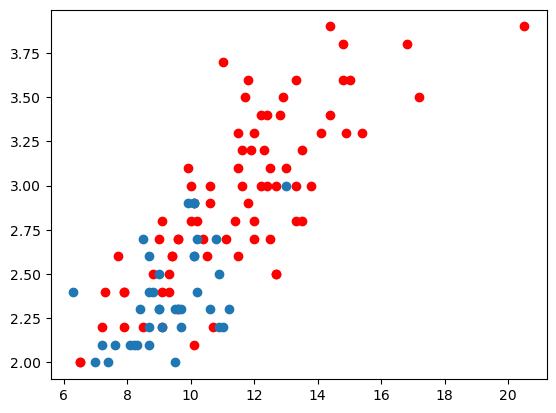

In [24]:
plt.scatter(x_male[:, 1], x_male[:, 0], color='r')
plt.scatter(x_female[:, 1], x_female[:, 0])

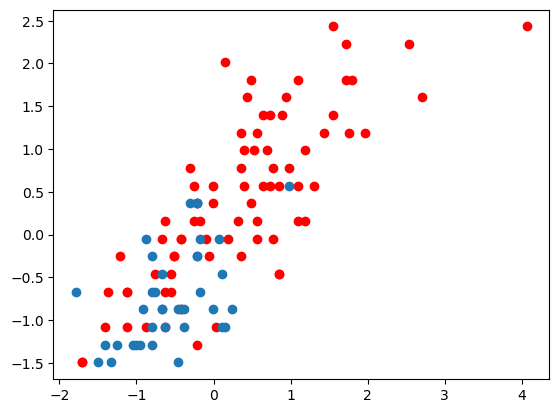

In [25]:
plt.scatter(x_male_scaled[:, 1], x_male_scaled[:, 0], color='r')
plt.scatter(x_female_scaled[:, 1], x_female_scaled[:, 0])

Observation: The data points are zeros centered (more close to zero) after normaliziation. 

شکل داده در هر دو نمودار یکسان است چون تنها اسکیل داده ها تغییر کرده

In [26]:
C = np.logspace(-2, 5, num=8)
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [27]:
gamma = np.logspace(-6, 1, num=16)
gamma

array([1.00000000e-06, 2.92864456e-06, 8.57695899e-06, 2.51188643e-05,
       7.35642254e-05, 2.15443469e-04, 6.30957344e-04, 1.84784980e-03,
       5.41169527e-03, 1.58489319e-02, 4.64158883e-02, 1.35935639e-01,
       3.98107171e-01, 1.16591440e+00, 3.41454887e+00, 1.00000000e+01])

In [28]:
def acc(pred, y):
    return np.mean(pred == y)

# Linear

In [29]:
best_acc = 0
best_c = 0
best_g = 0
best_model = None
for g in gamma:
    for c in C:
        clf = SVC(C=c, gamma=g,kernel='linear')
        clf.fit(x_train_scaled, y_train_scaled)
        accuracy = acc(clf.predict(x_train_scaled), y_train_scaled)
        if accuracy > best_acc:
            best_acc = accuracy
            best_c = c
            best_g = g
            best_model = clf
        
print(f'best acc: {best_acc}, best C: {best_c}, best gamma: {best_g}')

best acc: 0.7913043478260869, best C: 10.0, best gamma: 1e-06


# Gaussian

In [30]:
best_acc = 0
best_c = 0
best_g = 0
best_model_rbf = None
for g in gamma:
    for c in C:
        clf = SVC(C=c, gamma=g,kernel='rbf')
        clf.fit(x_train_scaled, y_train_scaled)
        accuracy = acc(clf.predict(x_train_scaled), y_train_scaled)
        if accuracy > best_acc:
            best_acc = accuracy
            best_c = c
            best_g = g
            best_model_rbf = clf
        
print(f'best acc: {best_acc}, best C: {best_c}, best gamma: {best_g}')

best acc: 0.9739130434782609, best C: 100000.0, best gamma: 3.414548873833601


the gaussian filter has better performance.

as we could see in the plots the data isn't linearly seperatable, so using gaussian filter that introduces non-linearity makes the model perform better on seperating the two classes and though giving better performance.

In [31]:
test_acc = acc(best_model_rbf.predict(x_test_scaled), y_test_scaled)
print("test accuracy: ", test_acc)

test accuracy:  0.6551724137931034
